In [10]:
import timeit
import math
import cv2
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.pyplot import jet
from skimage.color import label2rgb
from cuda_slic import slic
from sklearn.model_selection import ParameterGrid
from matplotlib import cm
from collections import OrderedDict

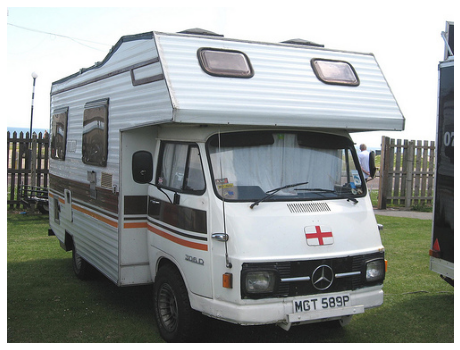

In [11]:
img_path = 'resources/ILSVRC2012_val_00000014.JPEG'
img = cv2.imread(img_path)
plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));
plt.axis('off');
img = cv2.GaussianBlur(img, (7, 7), 1)
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2Lab)[:, :, 1:]

## Speedtest iterations

In [12]:
img_lab = np.zeros((500, 500, 3))
for max_iter in [5, 10, 15, 20]:
    def cuda_slic():
        labels = slic(img_lab, n_segments=100, compactness=5, max_iter=max_iter, convert2lab=False,
                      enforce_connectivity=False)
        return labels


    print(timeit.timeit('cuda_slic()', globals=locals(), number=300) / 300)


0.018370531710000554
0.03114252775000447
0.04521694707664816
0.055087576566632684


In [13]:
def cuda_slic(img_lab, n_segments, compactness, max_iter=3):
    labels = slic(img_lab, n_segments=n_segments, compactness=compactness, max_iter=max_iter, convert2lab=False,
                  enforce_connectivity=False)
    npix = np.max(labels)

    from matplotlib import cm
    c_dict = cm.get_cmap('jet')._segmentdata
    jet_cm = LinearSegmentedColormap('bla', segmentdata=c_dict, N=npix)
    colors = cm.get_cmap(jet_cm, npix)(np.arange(npix))
    np.random.shuffle(colors)

    L = label2rgb(labels, colors=colors, bg_label=-1)
    return L

In [34]:
options_segments = [100, 250]
options_compactness = [7.5, 100]
options_iter = [10]
param_grid = ParameterGrid({'n_segments': options_segments,
                            'compactness': options_compactness})

In [35]:
def eval_image(img, param_grid):
    results = {}
    for params in param_grid:
        results[f'segments: {params["n_segments"]} m: {params["compactness"]}'] = \
            cuda_slic(img, n_segments=params['n_segments'], compactness=params['compactness'])
    return results

In [36]:
image_results = eval_image(img, param_grid)
#print(image_results['segments: 100 m: 2.5'])

In [37]:
def plot_results(results):
    cols = 2
    rows = math.ceil(len(results)/cols)
    fig, ax = plt.subplots(rows, cols, figsize=(15, rows*6))
    for i, (title, res) in enumerate(sorted(results.items(), key=lambda kv: kv[0])):
        ax[i // 2, i % cols].imshow(res)
        ax[i // 2, i % cols].set_title(title)
        ax[i // 2, i % cols].axis('off');

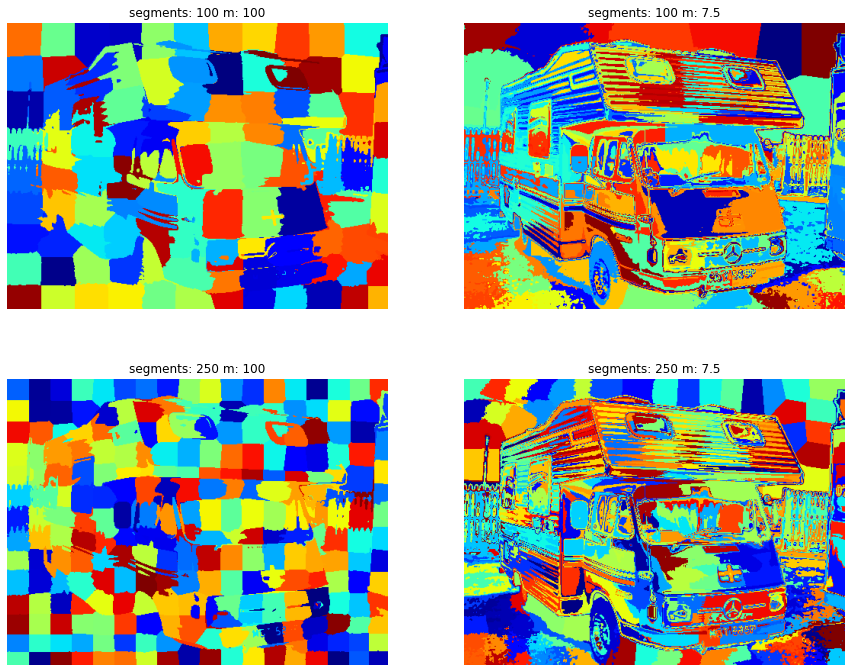

In [39]:
plot_results(image_results)
plt.savefig('example_segments.png')

In [9]:
labels = slic(img_lab, n_segments=100, compactness=5, max_iter=10, convert2lab=False,
                      enforce_connectivity=False)
labels

array([[ 13,  13,  13, ...,  10,  10,  10],
       [ 13,  13,  13, ...,  10,  10,  10],
       [ 13,  13,  13, ...,  23,  10,  10],
       ...,
       [ 97,  97,  97, ..., 108, 108, 107],
       [ 85,  85,  97, ..., 108, 108, 107],
       [ 85,  85,  85, ..., 108, 108, 108]])

In [10]:
cv2.imwrite('resources/test.png', labels)

True

In [11]:
np.save('resources/test.npy', labels)

In [12]:
res = cv2.imread('resources/test.png')[:, :, 0]
res

array([[ 13,  13,  13, ...,  10,  10,  10],
       [ 13,  13,  13, ...,  10,  10,  10],
       [ 13,  13,  13, ...,  23,  10,  10],
       ...,
       [ 97,  97,  97, ..., 108, 108, 107],
       [ 85,  85,  97, ..., 108, 108, 107],
       [ 85,  85,  85, ..., 108, 108, 108]], dtype=uint8)

In [13]:
res.shape

(400, 500)

In [14]:
segment = np.fromfile('resources/test.png', dtype=np.uint8)

In [15]:
segment = cv2.imdecode(segment, cv2.IMREAD_COLOR)[:, :, 0]

In [16]:
segment

array([[ 13,  13,  13, ...,  10,  10,  10],
       [ 13,  13,  13, ...,  10,  10,  10],
       [ 13,  13,  13, ...,  23,  10,  10],
       ...,
       [ 97,  97,  97, ..., 108, 108, 107],
       [ 85,  85,  97, ..., 108, 108, 107],
       [ 85,  85,  85, ..., 108, 108, 108]], dtype=uint8)

SLIC number of segments: 55


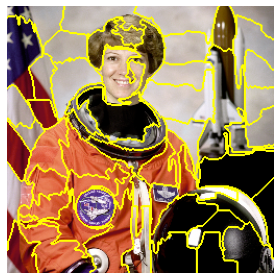

In [61]:
import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

img = img_as_float(astronaut()[::2, ::2])


segments_slic = slic(img, n_segments=100, compactness=7.5, max_iter=2,sigma=1,
                     start_label=1)

print(f"SLIC number of segments: {len(np.unique(segments_slic))}")
plt.imshow(mark_boundaries(img, segments_slic))
plt.axis('off')

plt.tight_layout()
plt.savefig('slic_astronaut.png')
plt.show()


In [64]:
import skimage.data as d
import cv2

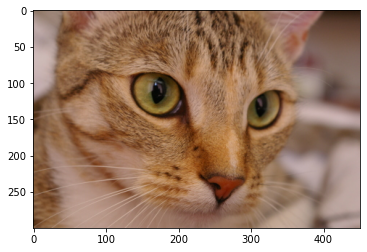

In [63]:
plt.imshow(d.cat())

In [65]:
plt.imsave('cat_rgb.png', d.cat())

In [68]:
gr = cv2.cvtColor(d.cat(), cv2.COLOR_RGB2GRAY)
print(gr.shape)
cv2.imwrite('cat_gray.png', gr)

(300, 451)


True